# Part 8: Combine Datasets

Combine the datasets and prepare training dataframes

In [384]:
import os
import sys
import datetime
from collections import defaultdict
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import IPython
import sklearn
sklearn.__version__

'0.24.2'

In [385]:
#notebook formatting things
from IPython.display import display, HTML
display(HTML("<style>div.output_scroll { height: 60em; }</style>"))
# This changes the width of the coding area
display(HTML("<style>.container { width:95% !important; }</style>"))
# this will make pandas show all columns, using a slider
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 60)

In [386]:
data_dir = "./data"
data_files = [f for f in os.listdir(data_dir) if f.endswith("csv")]
print(data_files)

['google_trends.csv', 'tidy_fred.csv', 'umich_exp.csv', 'us_pau_claims.csv']


In [412]:
origdf = None
for f in data_files:
  print("**{0}".format(f))
  df = pd.read_csv(os.path.join(data_dir, f))
  print("  shape: {0}".format(df.shape))
  print("  df columns: {0}".format(','.join(df.columns)))
  if origdf is None:
    origdf = df
  else:
    origdf = origdf.merge(df, on="date", how="outer", )

origdf['date'] = pd.to_datetime(origdf['date'])

origdf.sort_values(by="date", inplace=True)
origdf.set_index("date", inplace=True)
#print(origdf.shape)
#display(origdf.head(2))

**google_trends.csv
  shape: (400, 23)
  df columns: date,part time jobs near me,hiring near me part time,jobs hiring near me,hiring near me,jobs near me part time,hiring jobs near me part time,job hiring near me part time,amazon work from home jobs near me,jobs near me part time hiring,job hiring near me,jobs,work from home jobs amazon,work from home jobs,jobs near me hiring,indeed jobs near me,work from home,jobs near me,indeed jobs,work,jobs near me hiring part time,indeed jobs hiring near me,part time jobs hiring
**tidy_fred.csv
  shape: (1116, 18)
  df columns: date,PAYEMS:Total Nonfarm,USPRIV: BLS private,UNRATE: Unemployment Rate,UNEMPLOY: Unemployment Level,CLF16OV: Civilian Labor Force,UEMP27OV: Unemployed for 27 Weeks,CIVPART: Civilian Participation Rate,ICSA: Initial Claims,CCSA: Continued Claims ,JTS1000JOL: Job Openings: Total Private,JTS1000HIL:  Hires: Total Private ,JTS1000TSL:  Total Separations: Total Private ,NPPTTL: ADP,U6Rate: Unemployed plus Marginally Attached ,L

In [413]:
if False:
  import seaborn as sns
  cols = ["PAYEMS:Total Nonfarm","USPRIV: BLS private", 'NPPTTL: ADP']
  corr = origdf[cols].corr()
  sns.set(rc = {'figure.figsize':(22,22)})
  ax = sns.heatmap(
      corr, 
      vmin=-1, vmax=1, center=0,
      cmap=sns.diverging_palette(20, 220, n=200),
      square=True
  )
  ax.set_xticklabels(
      ax.get_xticklabels(),
      rotation=45,
      horizontalalignment='right'
  );

In [414]:
if False:
  #  Show the start, cnt and freq of all the variables
  #   nice to see which are daily, weekly, monthly et cetera
  origdf.notna().sum()
  tups = []
  for col in origdf.columns:
    first_dt = df.loc[origdf[col].notna()].index.min()
    last_dt = origdf.loc[origdf[col].notna()].index.max()  
    days = (last_dt - first_dt).days
    months = days/30.0
    cnt  = origdf.loc[origdf[col].notna()].shape[0]
    obs_per_month = np.round(cnt / (months), 1)
    tups.append((col, first_dt, last_dt, days, months, cnt, obs_per_month))
  x = pd.DataFrame(tups, columns=["col", "first", "last", "days", "months", "cnt", "obs_per_month"])
  x

In [415]:
# set ycol and xclos

data_start_dt =  datetime.datetime(2020, 1,1)

tempdf = origdf.copy()
orig_ycol = [c for c in list(origdf.columns) if c.startswith("PAY")][0]
y_l1 = orig_ycol + "_l1"
nexty = "next_" + orig_ycol
new_ycol = nexty
tempdf[y_l1] =  tempdf[orig_ycol].shift(1)
tempdf[nexty] = tempdf[orig_ycol].shift(-1)
xcols = list(tempdf.columns)
xcols.remove(orig_ycol)
xcols.remove(new_ycol)
tx = xcols
tx.remove(y_l1)
xcols = [y_l1] + tx 
fullx = fulldf[xcols]
fullx = fullx.ffill()

In [409]:

fully = fulldf[[new_ycol]]
newfull = fullx.join(fully)
data_start_dt =  datetime.datetime(2017, 1,1)

newfull = newfull.loc[newfull.index >= data_start_dt]

display(newfull)
#display(newfull.head(16).T.head())
#display(newfull.tail(16).T.head())
#display(newfull.tail(16).T.tail())

,PAYEMS:Total Nonfarm_l1,part time jobs near me,hiring near me part time,jobs hiring near me,hiring near me,jobs near me part time,hiring jobs near me part time,job hiring near me part time,amazon work from home jobs near me,jobs near me part time hiring,job hiring near me,jobs,work from home jobs amazon,work from home jobs,jobs near me hiring,indeed jobs near me,work from home,jobs near me,indeed jobs,work,jobs near me hiring part time,indeed jobs hiring near me,part time jobs hiring,USPRIV: BLS private,UNRATE: Unemployment Rate,UNEMPLOY: Unemployment Level,CLF16OV: Civilian Labor Force,UEMP27OV: Unemployed for 27 Weeks,CIVPART: Civilian Participation Rate,ICSA: Initial Claims,CCSA: Continued Claims,JTS1000JOL: Job Openings: Total Private,JTS1000HIL: Hires: Total Private,JTS1000TSL: Total Separations: Total Private,NPPTTL: ADP,U6Rate: Unemployed plus Marginally Attached,LNS12032194: Part-Time for Econ Reasons,CSCICP03USM665S: OECD US Consumer Confidence,BSCICP03USM665S: OECD Business Confidence,Personal Finance Expected,Business Condition 12 Months,Business Condition 5 Years,Expected Index,PUA IC,PUA CC,PEUC CC,next_PAYEMS:Total Nonfarm
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,145128.0,42.0,50.0,57.0,56.0,42.0,57.0,18.0,0.0,57.0,77.0,88.0,5.0,70.0,57.0,55.0,59.0,60.0,52.0,86.0,57.0,0.0,72.0,122883.0,4.6,7400.0,159486.0,1856.0,62.7,265000.0,2102000.0,5022.0,4752.0,4557.0,122808.364,9.3,5669.0,100.681100,99.9636,131.0,119.0,110.0,89.5,NaN,NaN,NaN,NaN
2017-01-03,145128.0,42.0,50.0,57.0,56.0,42.0,57.0,18.0,0.0,57.0,77.0,88.0,5.0,70.0,57.0,55.0,59.0,60.0,52.0,86.0,57.0,0.0,72.0,122883.0,4.6,7400.0,159486.0,1856.0,62.7,265000.0,2102000.0,5022.0,4752.0,4557.0,122808.364,9.3,5669.0,101.287600,100.2981,131.0,119.0,110.0,89.5,NaN,NaN,NaN,NaN
2017-01-05,145128.0,42.0,50.0,57.0,56.0,42.0,57.0,18.0,0.0,57.0,77.0,88.0,5.0,70.0,57.0,55.0,59.0,60.0,52.0,86.0,57.0,0.0,72.0,122883.0,4.6,7400.0,159486.0,1856.0,62.7,235000.0,2112000.0,5022.0,4752.0,4557.0,122965.275,9.3,5669.0,101.287600,100.2981,131.0,119.0,110.0,89.5,NaN,NaN,NaN,145303.0
2017-01-06,145128.0,42.0,50.0,57.0,56.0,42.0,57.0,18.0,0.0,57.0,77.0,88.0,5.0,70.0,57.0,55.0,59.0,60.0,52.0,86.0,57.0,0.0,72.0,123080.0,4.7,7529.0,159640.0,1831.0,62.7,235000.0,2112000.0,5022.0,4752.0,4557.0,122965.275,9.2,5598.0,101.287600,100.2981,131.0,119.0,110.0,89.5,NaN,NaN,NaN,NaN
2017-01-08,145303.0,58.0,66.0,54.0,58.0,58.0,52.0,18.0,0.0,52.0,72.0,92.0,6.0,64.0,54.0,37.0,62.0,59.0,54.0,90.0,52.0,20.0,80.0,123080.0,4.7,7529.0,159640.0,1831.0,62.7,235000.0,2112000.0,5022.0,4752.0,4557.0,122965.275,9.2,5598.0,101.287600,100.2981,131.0,119.0,110.0,89.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-17,147553.0,61.0,53.0,68.0,78.0,61.0,44.0,58.0,100.0,44.0,52.0,70.0,26.0,75.0,68.0,74.0,80.0,81.0,92.0,82.0,44.0,32.0,45.0,125569.0,4.8,7674.0,161354.0,2683.0,61.6,293000.0,2593000.0,9603.0,6008.0,5712.0,123853.888,8.5,4468.0,97.704797,101.7605,111.0,74.0,75.0,65.1,2565.0,270013.0,244379.0,NaN
2021-10-21,147553.0,61.0,53.0,68.0,78.0,61.0,44.0,58.0,100.0,44.0,52.0,70.0,26.0,75.0,68.0,74.0,80.0,81.0,92.0,82.0,44.0,32.0,45.0,125569.0,4.8,7674.0,161354.0,2683.0,61.6,290000.0,2481000.0,9603.0,6008.0,5712.0,123853.888,8.5,4468.0,97.704797,101.7605,111.0,74.0,75.0,65.1,2565.0,270013.0,244379.0,NaN
2021-10-23,147553.0,61.0,53.0,68.0,78.0,61.0,44.0,58.0,100.0,44.0,52.0,70.0,26.0,75.0,68.0,74.0,80.0,81.0,92.0,82.0,44.0,32.0,45.0,125569.0,4.8,7674.0,161354.0,2683.0,61.6,290000.0,2481000.0,9603.0,6008.0,5712.0,123853.888,8.5,4468.0,97.704797,101.7605,111.0,74.0,75.0,65.1,2532.0,270013.0,244379.0,NaN


## Construct prediction matrices

First, make a dataframe with target and predictors
Will add a lagged predictor.
Have to be careful not to use any predictors that would only have been known when the target is known

So, we will only use X values where date is one day before Y value was known

In [422]:
ycol = nexty
xmat = newfull[xcols].ffill()
print(xmat.shape)

(811, 46)


In [432]:
# fill na with 0 for any that still have na
z = xmat.isna().sum()
ncols = list(z.loc[xmat.isna().sum() > 0].index)
xmat[ncols] = xmat[ncols].fillna(method="backfill")

In [433]:
ymat = pd.concat([fulldf[[ycol]].loc[fulldf[ycol].notna()], 
                 fulldf[[ycol]].tail(1)] )
#ymat = newfull[[ycol]].loc[fulldf[ycol].notna()]
pdf = ymat.join(xmat, how="inner")
print(pdf.shape)
display(pdf.head(1))
display(pdf.tail(2))

(59, 47)


,next_PAYEMS:Total Nonfarm,PAYEMS:Total Nonfarm_l1,part time jobs near me,hiring near me part time,jobs hiring near me,hiring near me,jobs near me part time,hiring jobs near me part time,job hiring near me part time,amazon work from home jobs near me,jobs near me part time hiring,job hiring near me,jobs,work from home jobs amazon,work from home jobs,jobs near me hiring,indeed jobs near me,work from home,jobs near me,indeed jobs,work,jobs near me hiring part time,indeed jobs hiring near me,part time jobs hiring,USPRIV: BLS private,UNRATE: Unemployment Rate,UNEMPLOY: Unemployment Level,CLF16OV: Civilian Labor Force,UEMP27OV: Unemployed for 27 Weeks,CIVPART: Civilian Participation Rate,ICSA: Initial Claims,CCSA: Continued Claims,JTS1000JOL: Job Openings: Total Private,JTS1000HIL: Hires: Total Private,JTS1000TSL: Total Separations: Total Private,NPPTTL: ADP,U6Rate: Unemployed plus Marginally Attached,LNS12032194: Part-Time for Econ Reasons,CSCICP03USM665S: OECD US Consumer Confidence,BSCICP03USM665S: OECD Business Confidence,Personal Finance Expected,Business Condition 12 Months,Business Condition 5 Years,Expected Index,PUA IC,PUA CC,PEUC CC
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-05,145303.0,145128.0,42.0,50.0,57.0,56.0,42.0,57.0,18.0,0.0,57.0,77.0,88.0,5.0,70.0,57.0,55.0,59.0,60.0,52.0,86.0,57.0,0.0,72.0,122883.0,4.6,7400.0,159486.0,1856.0,62.7,235000.0,2112000.0,5022.0,4752.0,4557.0,122965.275,9.3,5669.0,101.2876,100.2981,131.0,119.0,110.0,89.5,32078.0,66941.0,1896.0


,next_PAYEMS:Total Nonfarm,PAYEMS:Total Nonfarm_l1,part time jobs near me,hiring near me part time,jobs hiring near me,hiring near me,jobs near me part time,hiring jobs near me part time,job hiring near me part time,amazon work from home jobs near me,jobs near me part time hiring,job hiring near me,jobs,work from home jobs amazon,work from home jobs,jobs near me hiring,indeed jobs near me,work from home,jobs near me,indeed jobs,work,jobs near me hiring part time,indeed jobs hiring near me,part time jobs hiring,USPRIV: BLS private,UNRATE: Unemployment Rate,UNEMPLOY: Unemployment Level,CLF16OV: Civilian Labor Force,UEMP27OV: Unemployed for 27 Weeks,CIVPART: Civilian Participation Rate,ICSA: Initial Claims,CCSA: Continued Claims,JTS1000JOL: Job Openings: Total Private,JTS1000HIL: Hires: Total Private,JTS1000TSL: Total Separations: Total Private,NPPTTL: ADP,U6Rate: Unemployed plus Marginally Attached,LNS12032194: Part-Time for Econ Reasons,CSCICP03USM665S: OECD US Consumer Confidence,BSCICP03USM665S: OECD Business Confidence,Personal Finance Expected,Business Condition 12 Months,Business Condition 5 Years,Expected Index,PUA IC,PUA CC,PEUC CC
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-07,147553.0,147190.0,68.0,35.0,79.0,79.0,68.0,64.0,35.0,40.0,64.0,70.0,73.0,18.0,71.0,79.0,80.0,74.0,83.0,95.0,79.0,64.0,39.0,53.0,125145.0,5.2,8384.0,161537.0,3179.0,61.7,326000.0,2714000.0,9881.0,6166.0,5515.0,123853.888,8.8,4469.0,99.344356,101.501996,111.0,74.0,75.0,65.1,22993.0,549103.0,440435.0
2021-10-28,NaN,147553.0,67.0,46.0,69.0,75.0,67.0,49.0,0.0,0.0,49.0,44.0,72.0,27.0,72.0,69.0,78.0,77.0,80.0,100.0,85.0,49.0,37.0,41.0,125569.0,4.8,7674.0,161354.0,2683.0,61.6,281000.0,2243000.0,9603.0,6008.0,5712.0,123853.888,8.5,4468.0,97.704797,101.760500,111.0,74.0,75.0,65.1,2532.0,270013.0,244379.0


In [434]:
pdf.corr()
if False:
  import seaborn as sns
  cols = ["PAYEMS:Total Nonfarm","USPRIV: BLS private", 'NPPTTL: ADP']
  # methods: 'pearson', 'kendall', 'spearman'
  corr = pdf.corr(method = 'kendall')
  sns.set(rc = {'figure.figsize':(16,16)})
  ax = sns.heatmap(
      corr, 
      vmin=-1, vmax=1, center=0,
      cmap=sns.diverging_palette(20, 220, n=200),
      square=True
  )
  ax.set_xticklabels(
      ax.get_xticklabels(),
      rotation=45,
      horizontalalignment='right'
  );

In [435]:
if False:
  pcols = [ycol, "last_PAYEMS:Total Nonfarm","USPRIV: BLS private", 'NPPTTL: ADP']
  inds = np.logical_and(pdf.index > datetime.datetime(2019, 4, 1),
                         pdf.index < datetime.datetime(2021, 12, 1))
  pdf.loc[inds, pcols].plot(figsize=[24,6], grid=True, marker='o')

In [436]:
diffdf = pdf.diff(1).copy()
#diffdf.fillna(0, inplace=True)
diffdf = diffdf.loc[diffdf.index > diffdf.index[0]]
display(diffdf.head(2))
display(diffdf.tail(2))

,next_PAYEMS:Total Nonfarm,PAYEMS:Total Nonfarm_l1,part time jobs near me,hiring near me part time,jobs hiring near me,hiring near me,jobs near me part time,hiring jobs near me part time,job hiring near me part time,amazon work from home jobs near me,jobs near me part time hiring,job hiring near me,jobs,work from home jobs amazon,work from home jobs,jobs near me hiring,indeed jobs near me,work from home,jobs near me,indeed jobs,work,jobs near me hiring part time,indeed jobs hiring near me,part time jobs hiring,USPRIV: BLS private,UNRATE: Unemployment Rate,UNEMPLOY: Unemployment Level,CLF16OV: Civilian Labor Force,UEMP27OV: Unemployed for 27 Weeks,CIVPART: Civilian Participation Rate,ICSA: Initial Claims,CCSA: Continued Claims,JTS1000JOL: Job Openings: Total Private,JTS1000HIL: Hires: Total Private,JTS1000TSL: Total Separations: Total Private,NPPTTL: ADP,U6Rate: Unemployed plus Marginally Attached,LNS12032194: Part-Time for Econ Reasons,CSCICP03USM665S: OECD US Consumer Confidence,BSCICP03USM665S: OECD Business Confidence,Personal Finance Expected,Business Condition 12 Months,Business Condition 5 Years,Expected Index,PUA IC,PUA CC,PEUC CC
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-02-02,251.0,175.0,6.0,4.0,-5.0,-10.0,6.0,-20.0,50.0,0.0,-20.0,-22.0,-2.0,-3.0,-11.0,-5.0,-3.0,-17.0,-7.0,-2.0,2.0,-20.0,19.0,2.0,197.0,0.1,129.0,154.0,-25.0,0.0,11000.0,-48000.0,-50.0,96.0,125.0,255.821,-0.1,-71.0,0.2170,0.3060,-1.0,2.0,2.0,0.8,0.0,0.0,0.0
2017-03-09,244.0,251.0,-16.0,-5.0,-1.0,-3.0,-16.0,23.0,-52.0,0.0,23.0,5.0,-6.0,1.0,-4.0,-1.0,-25.0,3.0,-5.0,4.0,-8.0,23.0,-1.0,-7.0,198.0,0.1,106.0,76.0,19.0,0.2,-3000.0,-6000.0,45.0,83.0,-23.0,345.451,0.2,242.0,-0.1844,0.3489,-7.0,-9.0,0.0,-3.8,0.0,0.0,0.0


,next_PAYEMS:Total Nonfarm,PAYEMS:Total Nonfarm_l1,part time jobs near me,hiring near me part time,jobs hiring near me,hiring near me,jobs near me part time,hiring jobs near me part time,job hiring near me part time,amazon work from home jobs near me,jobs near me part time hiring,job hiring near me,jobs,work from home jobs amazon,work from home jobs,jobs near me hiring,indeed jobs near me,work from home,jobs near me,indeed jobs,work,jobs near me hiring part time,indeed jobs hiring near me,part time jobs hiring,USPRIV: BLS private,UNRATE: Unemployment Rate,UNEMPLOY: Unemployment Level,CLF16OV: Civilian Labor Force,UEMP27OV: Unemployed for 27 Weeks,CIVPART: Civilian Participation Rate,ICSA: Initial Claims,CCSA: Continued Claims,JTS1000JOL: Job Openings: Total Private,JTS1000HIL: Hires: Total Private,JTS1000TSL: Total Separations: Total Private,NPPTTL: ADP,U6Rate: Unemployed plus Marginally Attached,LNS12032194: Part-Time for Econ Reasons,CSCICP03USM665S: OECD US Consumer Confidence,BSCICP03USM665S: OECD Business Confidence,Personal Finance Expected,Business Condition 12 Months,Business Condition 5 Years,Expected Index,PUA IC,PUA CC,PEUC CC
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-07,363.0,369.0,1.0,-5.0,9.0,4.0,1.0,15.0,1.0,21.0,15.0,28.0,3.0,1.0,5.0,9.0,9.0,5.0,-3.0,2.0,0.0,15.0,-61.0,3.0,377.0,-0.2,-318.0,190.0,-246.0,0.0,-14000.0,-34000.0,727.0,-120.0,204.0,529.595,-0.4,-14.0,0.000000,0.000000,0.0,0.0,0.0,0.0,-79528.0,-4541421.0,-3364573.0
2021-10-28,NaN,363.0,-1.0,11.0,-10.0,-4.0,-1.0,-15.0,-35.0,-40.0,-15.0,-26.0,-1.0,9.0,1.0,-10.0,-2.0,3.0,-3.0,5.0,6.0,-15.0,-2.0,-12.0,424.0,-0.4,-710.0,-183.0,-496.0,-0.1,-45000.0,-471000.0,-278.0,-158.0,197.0,0.000,-0.3,-1.0,-1.639559,0.258504,0.0,0.0,0.0,0.0,-20461.0,-279090.0,-196056.0


In [437]:
pdf.corr()
if False:
  import seaborn as sns
  cols = ["PAYEMS:Total Nonfarm","USPRIV: BLS private", 'NPPTTL: ADP']
  # methods: 'pearson', 'kendall', 'spearman'
  corr = diffdf.corr(method = 'kendall')
  sns.set(rc = {'figure.figsize':(16,16)})
  ax = sns.heatmap(
      corr, 
      vmin=-1, vmax=1, center=0,
      cmap=sns.diverging_palette(20, 220, n=200),
      square=True
  )
  ax.set_xticklabels(
      ax.get_xticklabels(),
      rotation=45,
      horizontalalignment='right'
  );

In [494]:
if False:
  N = diff_df.shape[0]
  trainN = int(N*.85)
  testN = N - trainN
  print(trainN, testN)

alli = diffdf.index
train_test_date = alli[int(np.round(len(alli)*0.8))]
print(c, new_ycol)

if True:
  traindf = diffdf.loc[diffdf.index < train_test_date]
  testdf = diffdf.iloc[diffdf.index >= train_test_date]
  xtrain = traindf.drop(new_ycol, axis=1)
  ytraindf = traindf[[new_ycol]]
  xtest = testdf.drop(new_ycol, axis=1)
  ytestdf = testdf[[new_ycol]]
  ytest = testdf[new_ycol].values

2020-12-03 00:00:00 next_PAYEMS:Total Nonfarm


In [505]:
xtrain.to_csv(os.path.join("./data/xtrain.csv"))
ytraindf.to_csv(os.path.join("./data/ytrain.csv"))

xtest.to_csv(os.path.join("./data/xtest.csv"))
             
ytestdf.to_csv(os.path.join("./data/ytest.csv"))

<AxesSubplot:xlabel='date'>

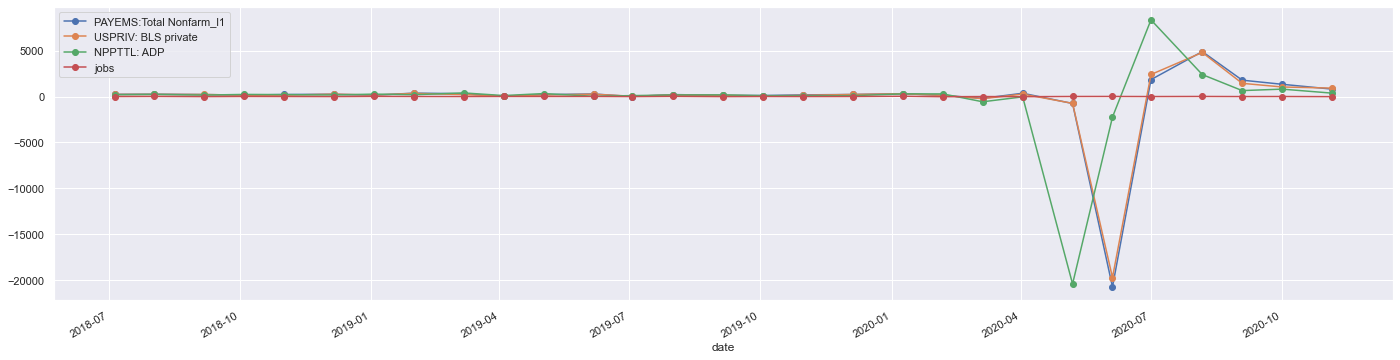

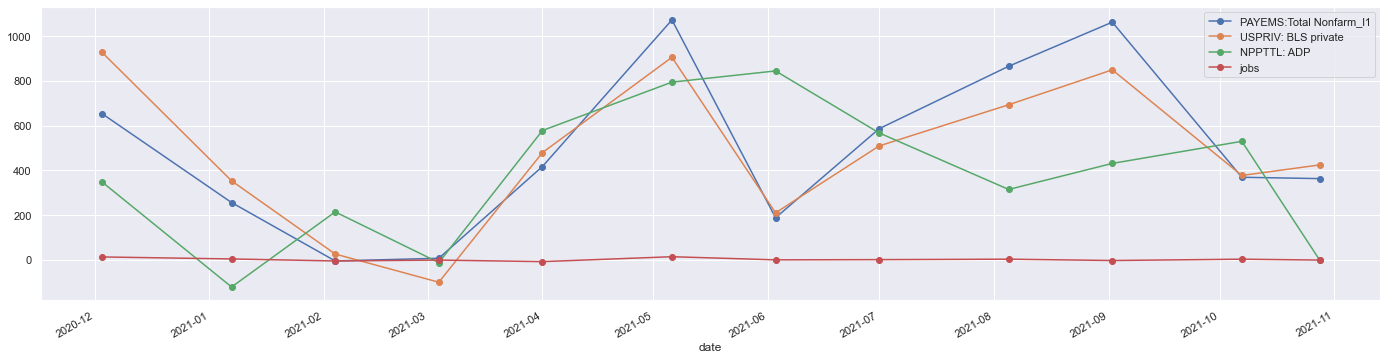

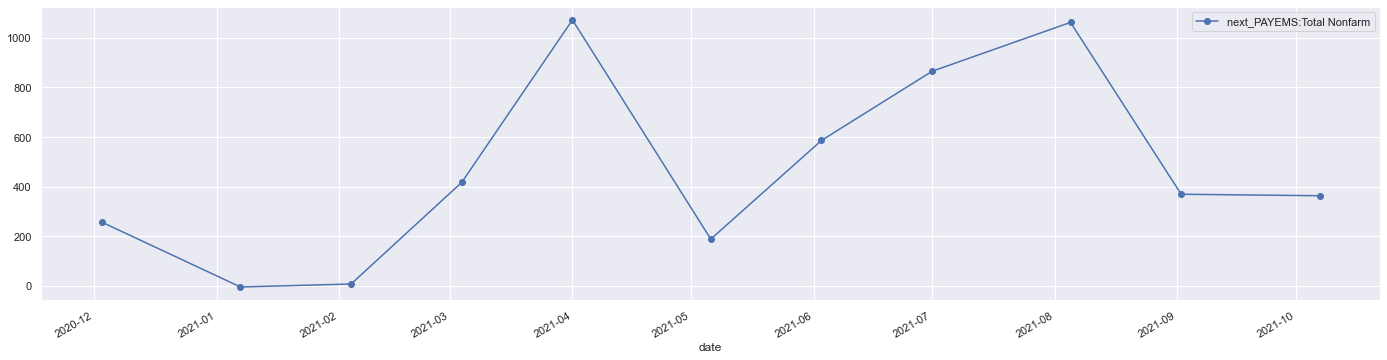

In [496]:
pcols = ["PAYEMS:Total Nonfarm_l1","USPRIV: BLS private", 'NPPTTL: ADP', 'jobs']
inds = xtrain.index > datetime.datetime(2018, 7, 1)
xtrain.loc[inds, pcols].plot(figsize=[24,6], grid=True, marker='o')
xtest[pcols].plot(figsize=[24,6], grid=True, marker='o')
ytestdf.plot(figsize=[24,6], grid=True, marker='o')

In [497]:
import sklearn
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV, ElasticNet, Lasso, LassoCV, Ridge, SGDRegressor
from sklearn.svm import LinearSVR
 
rf = RandomForestRegressor(max_depth=4, random_state=0)
lr = LinearRegression()
en = ElasticNet(random_state=0, normalize=True)
gb = GradientBoostingRegressor()
svm = LinearSVR(random_state=0, max_iter=90000, tol=0.1, loss = 'squared_epsilon_insensitive', dual=False, verbose=2)
rr = Ridge()
lacv = LassoCV(normalize=True, n_alphas=10, max_iter=11000)
lacv = Lasso(normalize=True, alpha=10, max_iter=11000)
sgd = SGDRegressor()

mod = en
mod.fit(xtrain, ytraindf)
ytrain_hat = mod.predict(xtrain)

In [498]:
model_methods = [m for m in dir(mod) if not m.startswith("_")]
print("{0}".format(",".join(model_methods)))
if isinstance(mod,  RandomForestRegressor) or isinstance(mod, GradientBoostingRegressor):
  #fig, ax = plt.subplots( figsize=[10,24])
  #ax.barh(list(xtrain.columns), mod.feature_importances_,)  
  xx = zip(list(xtrain.columns), mod.feature_importances_)
  x = pd.DataFrame(xx, columns=["var", "imp"])
  x.sort_values(by='imp', ascending=False, inplace=True) 
  display(x.head(10))  
if isinstance(mod, LinearRegression):
  fig, ax = plt.subplots( figsize=[8,18])
  ax.barh(list(xtrain.columns), mod.coef_) 

if isinstance(mod, ElasticNetCV) or isinstance(mod, ElasticNet) or isinstance(mod, Ridge) \
    or isinstance(mod, Lasso) or isinstance(mod, LassoCV) or isinstance(mod, SGDRegressor) :
  xx = zip(list(xtrain.columns), mod.coef_)
  x = pd.DataFrame(xx, columns=["var", "coef"])
  x['abscoef'] = x['coef'].abs()
  x.sort_values(by='abscoef', ascending=False, inplace=True)
  display(x.head(10))

alpha,coef_,copy_X,dual_gap_,fit,fit_intercept,get_params,intercept_,l1_ratio,max_iter,n_features_in_,n_iter_,normalize,path,positive,precompute,predict,random_state,score,selection,set_params,sparse_coef_,tol,warm_start


,var,coef,abscoef
28,CIVPART: Civilian Participation Rate,50.850406,50.850406
42,Expected Index,9.060646,9.060646
38,BSCICP03USM665S: OECD Business Confidence,8.756153,8.756153
41,Business Condition 5 Years,5.175952,5.175952
12,work from home jobs amazon,4.114979,4.114979
40,Business Condition 12 Months,3.762532,3.762532
13,work from home jobs,3.424291,3.424291
16,work from home,2.744112,2.744112
19,work,-2.366633,2.366633
35,U6Rate: Unemployed plus Marginally Attached,-2.216132,2.216132


(12, 46) (12,) (12,)


<AxesSubplot:xlabel='date'>

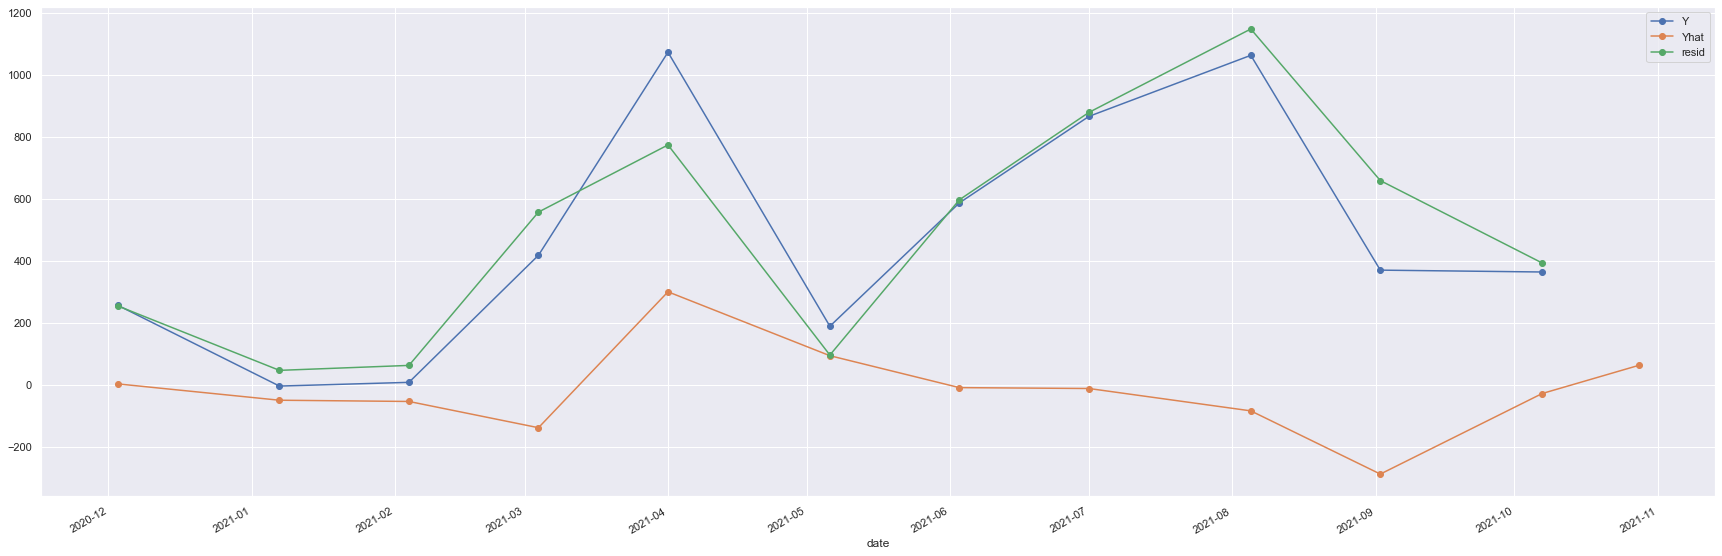

In [499]:
ytest_hat = mod.predict(xtest)

print(xtest.shape, ytest.shape, ytest_hat.shape)
zz = pd.DataFrame(data = {"Y":ytest, "Yhat":ytest_hat}, index=testdf.index)
zz['resid'] = zz['Y'] - zz['Yhat']
zz.plot(figsize = [30,10], marker = 'o', grid=True,)

In [500]:
#  what is this for??
if False:
  nrows=1
  ncols=1
  figwd=20
  fight=10
  sharex=True
  fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=[figwd, fight], sharex=sharex)
  print(axs)
  ax = axs
  diffdf.tail(20).reset_index().plot(ax=ax,  y=ycol, figsize=[20,10], marker='o',
                            mec='red', mfc='black', ms=0.75, grid=True)
  ax.axhline(y=0)

(16, 3)


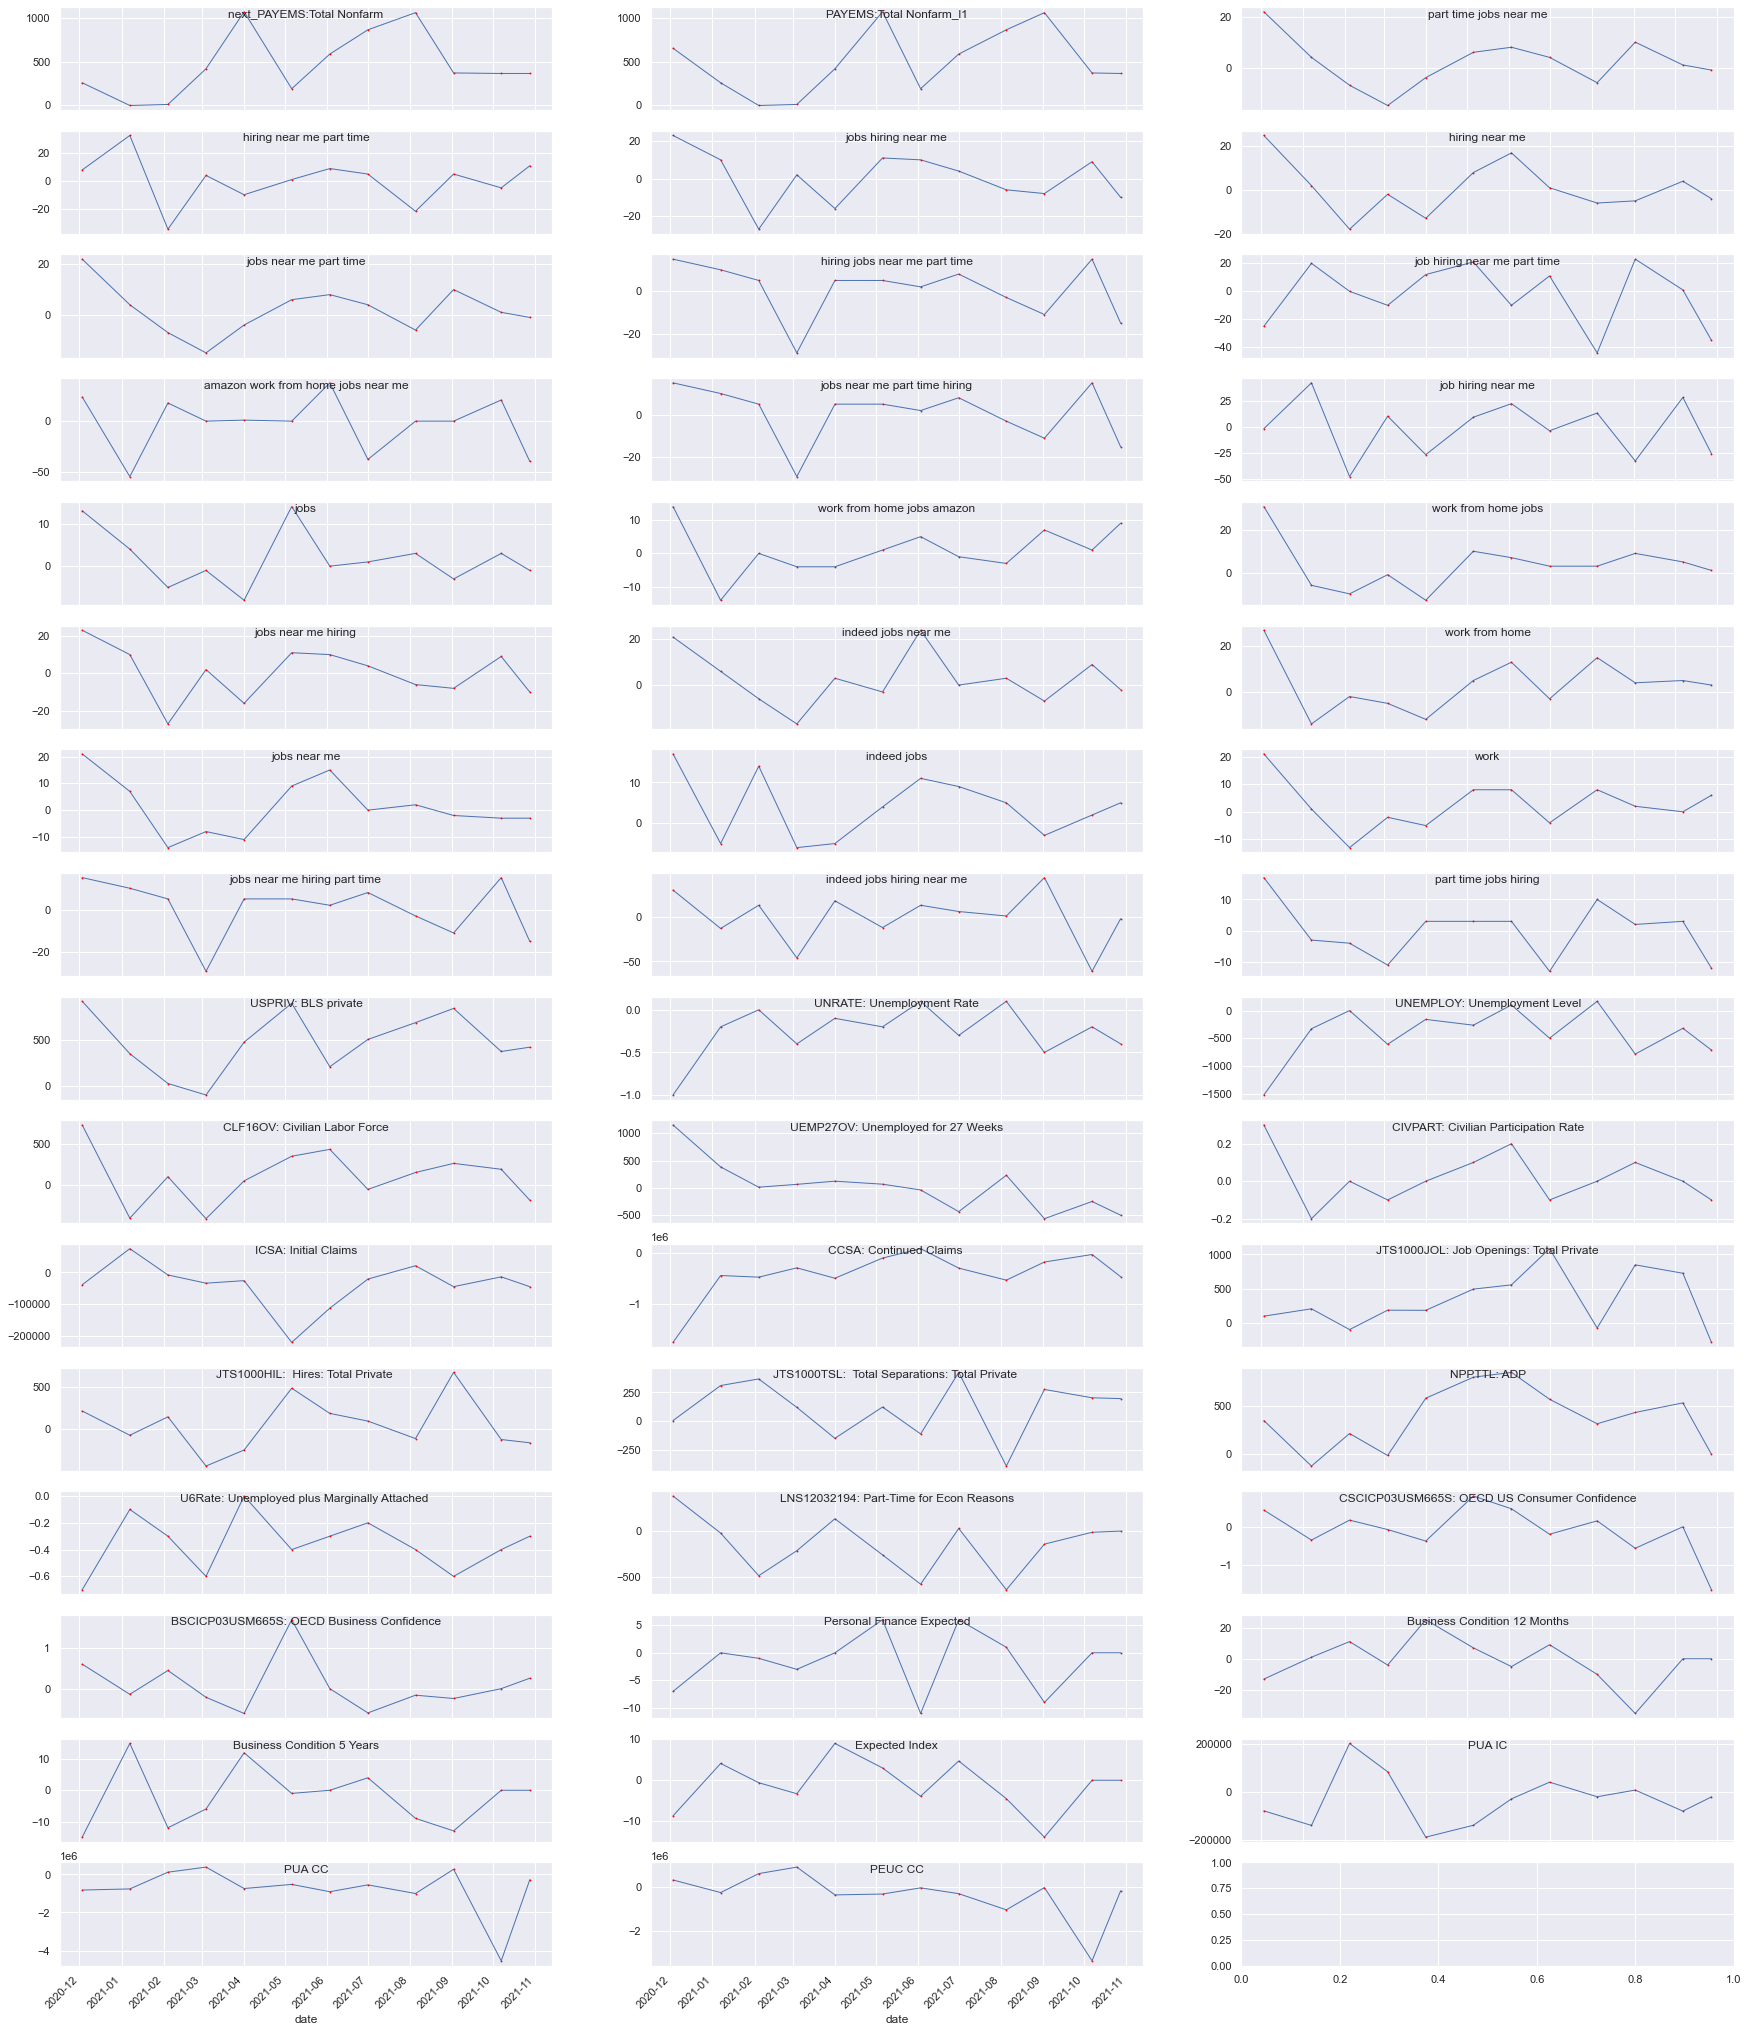

In [501]:
xcol = "date"
title = "title"
temp_df = testdf.loc[testdf.index > '2019-12-01'].copy()
temp_df.bfill(inplace=True)
temp_df.ffill(inplace=True)
temp_df.fillna(0, inplace=True)
temp_df.reset_index(inplace=True)

ycols = [c for c in temp_df.columns if c != "date"]

sharex = False
ncols=3
figwd=30
fight=40
xtick_rot = 45
ylim=(None, None)
nrows = int(np.ceil(len(ycols)/float(ncols)))
fig = None
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=[figwd, fight], sharex=sharex)  
print(axs.shape)
for i, ycol in enumerate(ycols):
  if ycol == "date":
    continue
  row = i // ncols
  col = i % ncols
  ax = axs[row][col]  
  #print(ycol)
  temp_df.plot(ax=ax, kind='line', x=xcol, y=ycol,linestyle='-', marker='o', lw=1, ylim=ylim,
                   mec='red', mfc='black', ms=0.85,  title=None, legend=None, label=None, grid=True, sharex=True)

  ax.text(.5,.9, ycol,
        horizontalalignment='center',
        transform=ax.transAxes)  
    
  ax.xaxis.set_tick_params(rotation=xtick_rot)     

plt.show()

In [476]:
print(*zip(ytest_hat, ytest))

(184.28905784585325, 131.0) (211.65765563550318, -197.0) (210.3598654427593, 358.0) (124.74113119303848, -758.0) (865.9910165376957, -20714.0) (248.0373889145966, 1840.0) (169.40020432073652, 4890.0) (91.6767150200819, 1780.0) (106.28558870596595, 1332.0) (151.61778099944004, 806.0) (93.4982629136504, 653.0) (126.15812357424723, 256.0) (170.84991560800063, -5.0) (199.83940836290674, 7.0) (199.46349164533837, 417.0) (195.1845656814755, 1072.0) (176.88676035287128, 188.0) (187.70722911670265, 586.0) (172.1200550873612, 865.0) (185.2432794631638, 1062.0) (182.64704635542245, 369.0) (178.8353291796888, 363.0) (182.3238234725228, nan)
